In [2]:
from netCDF4 import Dataset
import os
import wrf

# anthropogenic emissions file that user 'Rui-Silva' posted on WRF&MPAS-A forum
# https://forum.mmm.ucar.edu/threads/wrf-chem-not-reading-anthropogenic-emissions.10079/
ncfile = Dataset(os.path.join('/data/keeling/a/sf20/b/WRF4_4/WRF/test', "wrfchemi_d01_2012-06-20_00_00_00.nc"))

In [6]:
ncfile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Title: Anthropogenic emissions
    History: Created on 2021-02-25 at 14:18
    Author: anthro_emis
    WEST-EAST_GRID_DIMENSION: 410
    SOUTH-NORTH_GRID_DIMENSION: 300
    BOTTOM-TOP_GRID_DIMENSION: 60
    DX: 18000.0
    DY: 18000.0
    GRIDTYPE: C
    DIFF_OPT: 1
    KM_OPT: 4
    DAMP_OPT: 0
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 2
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 2
    SF_SFCLAY_PHYSICS: 1
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 1
    CU_PHYSICS: 5
    SF_LAKE_PHYSICS: 0
    SURFACE_INPUT_SOURCE: 1
    SST_UPDATE: 1
    GRID_FDDA: 2
    GFDDA_INTERVAL_M: 360
    GFDDA_END_H: 312
    GRID_SFDDA: 0
    SGFDDA_INTERVAL_M: 0
    SGFDDA_END_H: 0
    HYPSOMETRIC_OPT: 2
    USE_THETA_M: 0
    USE_MAXW_LEVEL: 0
    USE_TROP_LEVEL: 0
    GWD_OPT: 0
    SF_URBAN_PHYSICS: 0
    SF_OCEAN_PHYSICS: 0
    SIMULATION_INITIALIZATION_TYPE: REAL-DATA CASE
    WES

In [7]:
ncfile.variables['E_TOL']

<class 'netCDF4._netCDF4.Variable'>
float32 E_TOL(Time, emissions_zdim_stag, south_north, west_east)
    MemoryOrder: XYZ
    description: EMISSIONS
    units: mol km^-2 hr^-1
    stagger: Z
    FieldType: 104
unlimited dimensions: Time
current shape = (1, 1, 299, 409)
filling on, default _FillValue of 9.969209968386869e+36 used

In [7]:
ncfile.variables['E_PM25J']

<class 'netCDF4._netCDF4.Variable'>
float32 E_PM25J(Time, emissions_zdim_stag, south_north, west_east)
    MemoryOrder: XYZ
    description: EMISSIONS
    units: ug m^-2 s^-1
    stagger: Z
    FieldType: 104
unlimited dimensions: Time
current shape = (1, 1, 299, 409)
filling on, default _FillValue of 9.969209968386869e+36 used

In [8]:
t = wrf.getvar(ncfile, "Times", 
           #timeidx=1, 
           timeidx=wrf.ALL_TIMES
           )

In [9]:
t

<xarray.DataArray 'times' (Time: 1)>
array(['2012-06-20T00:00:00.000000000'], dtype='datetime64[ns]')
Dimensions without coordinates: Time
Attributes:
    description:  model times [np.datetime64]

In [25]:
emiss_data = ncfile.variables['E_PM25J'][:][0].data[0]

In [22]:
ncfile.variables['E_PM25J'][:][0].data.shape

(1, 299, 409)

/tmp/ipykernel_217016/211058664.py:4: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(emiss_data,vmin=1E-5, locator=ticker.LogLocator())


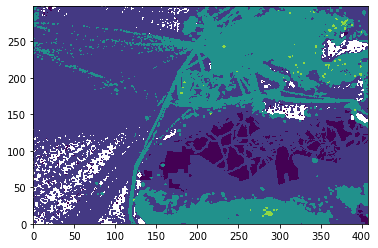

In [37]:
import matplotlib.pyplot as plt
from matplotlib import ticker

plt.contourf(emiss_data,vmin=1E-5, locator=ticker.LogLocator())